This is an exercise to generate, visualize and analyze time series using pandas.

In [1]:
import pandas as pd
import numpy as np

Part I

Create four data frames, indexed by time in the range 2021-10-10 20:00-20:30 and 2021-10-11 08:00-08:30 with time intervals = 0.5, 1, 5, 10 s.

For each data frame, construct a column 'A' that takes random int numbers between 1 and 100 inclusive.

In [2]:
def create_df(start_time1, end_time1, start_time2, end_time2, time_interval):
    time_range1 = pd.date_range(start = start_time1, end = end_time1, freq = time_interval) 
    time_range2 = pd.date_range(start = start_time2, end = end_time2, freq = time_interval) 
    df1 = pd.DataFrame(index = time_range1)
    df2 = pd.DataFrame(index = time_range2)
    df = pd.concat([df1, df2])
    df['A'] = np.random.randint(1,101,size = len(df))
    return df

In [3]:
start1 = '2021-10-10 20:00'
end1 = '2021-10-10 20:30'
start2 = '2021-10-11 08:00'
end2 = '2021-10-11 08:30'

df1 = create_df(start1,end1,start2,end2,'0.5 S')
df2 = create_df(start1,end1,start2,end2,'1 S')
df3 = create_df(start1,end1,start2,end2,'5 S')
df4 = create_df(start1,end1,start2,end2,'10 S')

Part II

Make a line plot of df4

<AxesSubplot:>

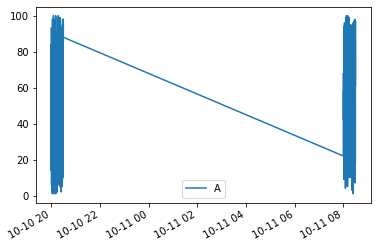

In [4]:
df4.plot()

By default, it creates a line plot versus the index, in our case, the time index. However, a wide range of x-axis contains no data. To improve the plot, we construct a new column ['tick'], which labels the i-th data as the i-th tick. Then plot A vs tick.

<AxesSubplot:xlabel='tick'>

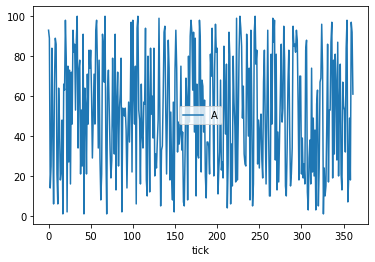

In [5]:
df4['tick'] = [i for i in range(len(df4))]
df4.plot(x='tick', y='A')
#df4 = df4.drop(['tick'],axis=1)

Create a histogram plot for df4

<AxesSubplot:ylabel='Frequency'>

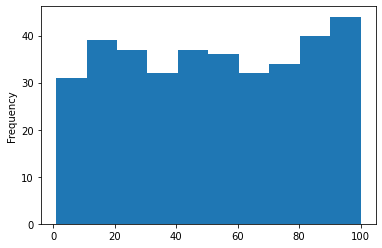

In [7]:
df4['A'].plot.hist()

Part III

In df4, create a new column ['dA'], that records the change in A from the previous row.

Count how many times dA is positive.

In [8]:
def get_dA(df):
    df['dA'] = df['A'].diff()
    return df

In [9]:
# postive dA
np.sum(get_dA(df4)['dA']>0)

176

In [10]:
# negative dA
np.sum(get_dA(df4)['dA']<0)

181

Count how many times dA is positive and even.

In [11]:
peven = (get_dA(df4)['dA']>0) & (get_dA(df4)['dA']%2 == 0)
np.sum(peven)
# or use peven.sum()

87

For these rows (where dA is both positive and even), plot histogram of dA.

<AxesSubplot:ylabel='Frequency'>

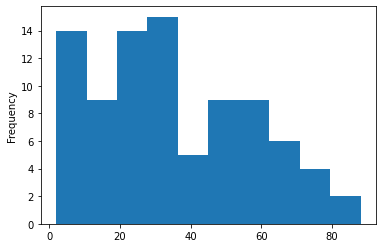

In [14]:
df4[peven]['dA'].plot.hist()

Drop ['tick'] and ['dA']

In [ ]:
df4 = df4.drop(['tick'],axis=1)
df4 = df4.drop(['dA'],axis=1)

Part IV

Concatenate all data frames, and order it with increasing time index. Call the new data frame df.

In [19]:
def concat_df(df1,df2,df3,df4):
    df = pd.concat([df1,df2,df3,df4])
    df['time'] = df.index
    df = df.sort_values(by='time')
    df = df.drop(['time'],axis=1)
    return df

In [20]:
df = concat_df(df1,df2,df3,df4)
df.head()

,A
2021-10-10 20:00:00.000,60
2021-10-10 20:00:00.000,10
2021-10-10 20:00:00.000,4
2021-10-10 20:00:00.000,93
2021-10-10 20:00:00.500,95


Create a data frame, named df_ignore1, which samples data every 1 second from the concatenated data frame df. That is, if the time stamp in df goes as 0, 0.5, 1, 1.5, 2,..., we only keep 0, 1, 2,... 

Create df_ignore2 that samples every 5 s.

In [21]:
def sample_df(df, sampling_time):
    df = df.resample(sampling_time).first()
    return df

In [22]:
df_ignore1 = sample_df(df, '1 S')
df_ignore1.head(10)

,A
2021-10-10 20:00:00,60.0
2021-10-10 20:00:01,65.0
2021-10-10 20:00:02,92.0
2021-10-10 20:00:03,16.0
2021-10-10 20:00:04,12.0
2021-10-10 20:00:05,29.0
2021-10-10 20:00:06,57.0
2021-10-10 20:00:07,21.0
2021-10-10 20:00:08,60.0
2021-10-10 20:00:09,21.0


In [23]:
df.head(10)

,A
2021-10-10 20:00:00.000,60
2021-10-10 20:00:00.000,10
2021-10-10 20:00:00.000,4
2021-10-10 20:00:00.000,93
2021-10-10 20:00:00.500,95
2021-10-10 20:00:01.000,65
2021-10-10 20:00:01.000,64
2021-10-10 20:00:01.500,77
2021-10-10 20:00:02.000,92
2021-10-10 20:00:02.000,78


Compute the median of 'A' for the 0 - 10 s, 10 - 20 s, etc (i.e. every 10 s).

In [24]:
def get_median(df,window):
    i = 0
    while i+window < len(df):
        temp_list = []
        for j in range(window):
            temp_list.append(df.iloc[i+j,0])
            temp_list.sort()
        if window%2 == 0:
            df.iloc[i,1] = (temp_list[window//2-1]+temp_list[window//2])/2
        if window%2 != 0:
            df.iloc[i,1] = temp_list[window//2]
        i += window
    return df

In [25]:
df_ignore1 = df_ignore1.reindex(columns = ['A', 'median'])

In [27]:
get_median(df_ignore1,10)
df_ignore1.head(50)

,A,median
2021-10-10 20:00:00,60.0,43.0
2021-10-10 20:00:01,65.0,NaN
2021-10-10 20:00:02,92.0,NaN
2021-10-10 20:00:03,16.0,NaN
2021-10-10 20:00:04,12.0,NaN
2021-10-10 20:00:05,29.0,NaN
2021-10-10 20:00:06,57.0,NaN
2021-10-10 20:00:07,21.0,NaN
2021-10-10 20:00:08,60.0,NaN
2021-10-10 20:00:09,21.0,NaN
